In [25]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

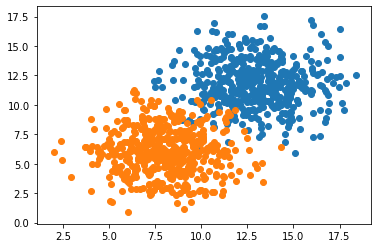

In [26]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [27]:
model=Sequential()
model.add(Dense(units=1,input_shape=(2,),activation='sigmoid'))
adam=Adam(lr=0.1)
model.compile(adam,loss='binary_crossentropy',metrics=['accuracy'])
h=model.fit(x=X,y=y,verbose=1,batch_size=50,epochs=500,shuffle='true')

Epoch 1/500
1000/1000 [==============================] - 0s 115us/step - loss: 2.7326 - accuracy: 0.4790
Epoch 2/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.9516 - accuracy: 0.4480
Epoch 3/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.6116 - accuracy: 0.6350
Epoch 4/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.4751 - accuracy: 0.8250
Epoch 5/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.4070 - accuracy: 0.8620
Epoch 6/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.3626 - accuracy: 0.8930
Epoch 7/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.3356 - accuracy: 0.9100
Epoch 8/500
1000/1000 [==============================] - 0s 34us/step - loss: 0.3011 - accuracy: 0.9310
Epoch 9/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.2693 - accuracy: 0.9430
Epoch 10/500
1000/1000 [==============================] - 0s 31

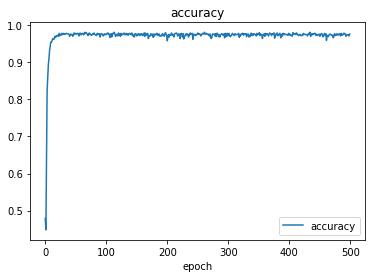

In [28]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

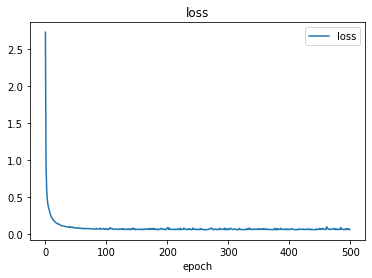

In [29]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [41]:
def plot_decision_boundary(X,y,model):
    x_span=np.linspace(min(X[:,0])-1,max(X[:,0])+1)
    y_span=np.linspace(min(X[:,1])-1,max(X[:,1])+1)
    xx,yy=np.meshgrid(x_span,y_span)
    xx_,yy_=xx.ravel(),yy.ravel()
    grid=np.c_[xx_,yy_]
    pred_func=model.predict(grid)
    z=pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

prediction is [[0.99998534]]


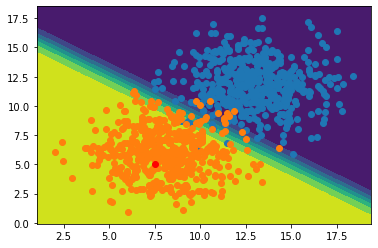

In [45]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x=7.5
y=5
point=np.array([[x,y]])
prediction=model.predict(point)
plt.plot([x],[y],marker="o",color="red")
print('prediction is',prediction)
